In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
from tqdm.auto import tqdm


palette = sns.set_palette("colorblind", color_codes=True)

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)


In [3]:
nnodes = [20,40,60,80,100,120,140,160]
DB_nodes = [4, 8, 16]
DB_cpus = 18
threads = 48
db_tpq = 1

aggregate = False

df_dbs = dict()
base_path = '../scaling-results/inference-scaling/'

functions = ['put_tensor', 'run_script', 'run_model', 'unpack_tensor']

for DB_node in tqdm(DB_nodes, desc=base_path):
 
    dfs = dict()

    for node in tqdm(nnodes, desc=f"{DB_node} DB nodes", leave=False):
        path_root = os.path.join(base_path, f'infer-sess-N{node}-T{threads}-DBN{DB_node}-DBC{DB_cpus}-DBTPQ{db_tpq}-*')
        path = glob(path_root)[0]
        files = os.listdir(path)
        
        function_times = {}

        for file in tqdm(files, desc=f"{node} client nodes", leave=False):
            if '.csv' in file and 'rank_' in file:
                fp = os.path.join(path, file)
                function_rank_times = {}
                with open(fp) as f:
                    for i, line in enumerate(f):
                        vals = line.split(',')
                        if vals[1] not in functions:
                            continue
                        if not aggregate:
                            if vals[1] in function_times.keys():
                                function_times[vals[1]].append(float(vals[2]))
                            else:
                                function_times[vals[1]] = [float(vals[2])]
                        else:
                            if vals[1] in function_rank_times.keys():
                                function_rank_times[vals[1]] += float(vals[2])
                            else:
                                function_rank_times[vals[1]] = float(vals[2])
                            
                for k,v in function_rank_times.items():
                    if k in function_times:
                        function_times[k].append(v)
                    else:
                        function_times[k] = [v]
            
        data_df = pd.DataFrame(function_times)
        dfs[node] = data_df

        # print(f"Completed {node} nodes for {DB_node} DB nodes")

    df_dbs[DB_node] = dfs

../scaling-results/inference-scaling/:   0%|          | 0/3 [00:00<?, ?it/s]

4 DB nodes:   0%|          | 0/8 [00:00<?, ?it/s]

20 client nodes:   0%|          | 0/966 [00:00<?, ?it/s]

40 client nodes:   0%|          | 0/1926 [00:00<?, ?it/s]

60 client nodes:   0%|          | 0/2886 [00:00<?, ?it/s]

80 client nodes:   0%|          | 0/3846 [00:00<?, ?it/s]

100 client nodes:   0%|          | 0/4806 [00:00<?, ?it/s]

120 client nodes:   0%|          | 0/5766 [00:00<?, ?it/s]

140 client nodes:   0%|          | 0/6726 [00:00<?, ?it/s]

160 client nodes:   0%|          | 0/7686 [00:00<?, ?it/s]

8 DB nodes:   0%|          | 0/8 [00:00<?, ?it/s]

20 client nodes:   0%|          | 0/966 [00:00<?, ?it/s]

40 client nodes:   0%|          | 0/1926 [00:00<?, ?it/s]

60 client nodes:   0%|          | 0/2886 [00:00<?, ?it/s]

80 client nodes:   0%|          | 0/3846 [00:00<?, ?it/s]

100 client nodes:   0%|          | 0/4806 [00:00<?, ?it/s]

120 client nodes:   0%|          | 0/5766 [00:00<?, ?it/s]

140 client nodes:   0%|          | 0/6726 [00:00<?, ?it/s]

160 client nodes:   0%|          | 0/7686 [00:00<?, ?it/s]

16 DB nodes:   0%|          | 0/8 [00:00<?, ?it/s]

20 client nodes:   0%|          | 0/966 [00:00<?, ?it/s]

40 client nodes:   0%|          | 0/1926 [00:00<?, ?it/s]

60 client nodes:   0%|          | 0/2886 [00:00<?, ?it/s]

80 client nodes:   0%|          | 0/3846 [00:00<?, ?it/s]

100 client nodes:   0%|          | 0/4806 [00:00<?, ?it/s]

120 client nodes:   0%|          | 0/5766 [00:00<?, ?it/s]

140 client nodes:   0%|          | 0/6726 [00:00<?, ?it/s]

160 client nodes:   0%|          | 0/7686 [00:00<?, ?it/s]

Plotting:   0%|          | 0/2 [00:00<?, ?it/s]

light style:   0%|          | 0/4 [00:00<?, ?it/s]

put_tensor:   0%|          | 0/3 [00:00<?, ?it/s]

unpack_tensor:   0%|          | 0/3 [00:00<?, ?it/s]

run_model:   0%|          | 0/3 [00:00<?, ?it/s]

run_script:   0%|          | 0/3 [00:00<?, ?it/s]

dark style:   0%|          | 0/4 [00:00<?, ?it/s]

put_tensor:   0%|          | 0/3 [00:00<?, ?it/s]

unpack_tensor:   0%|          | 0/3 [00:00<?, ?it/s]

run_model:   0%|          | 0/3 [00:00<?, ?it/s]

run_script:   0%|          | 0/3 [00:00<?, ?it/s]

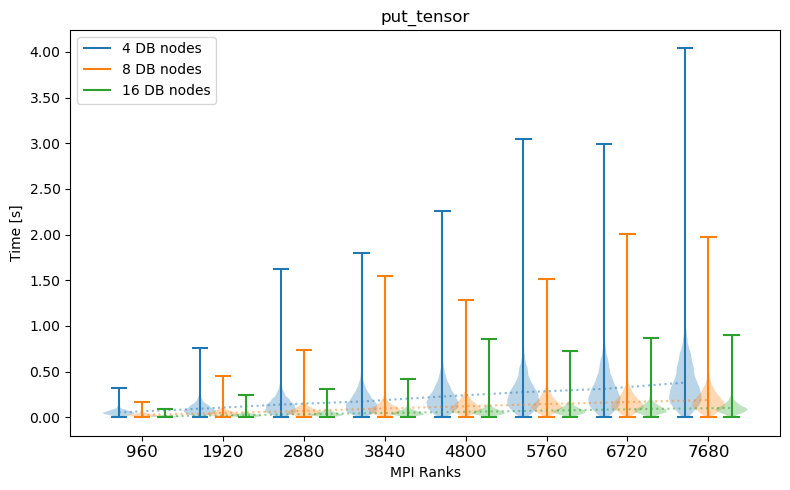

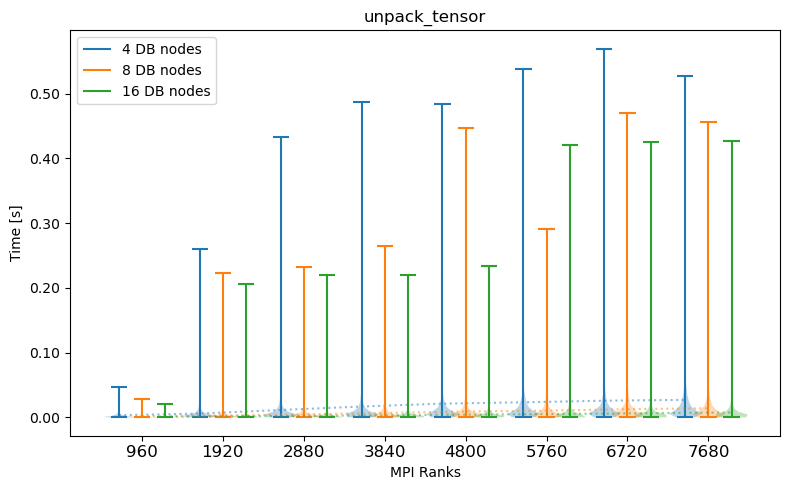

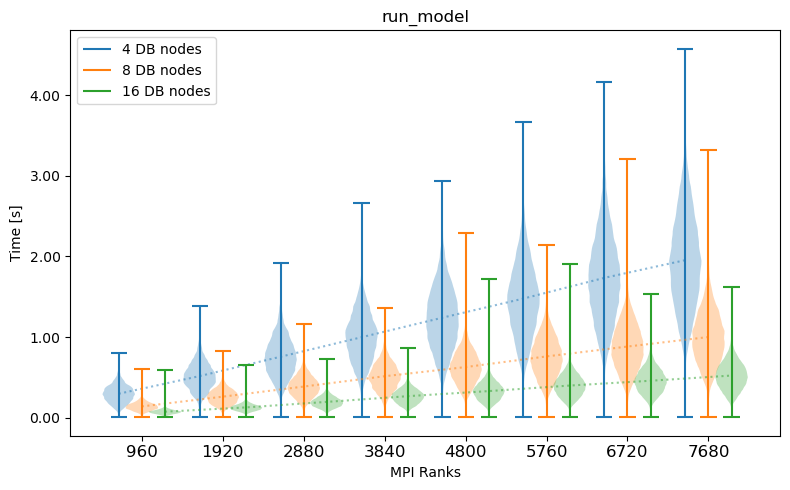

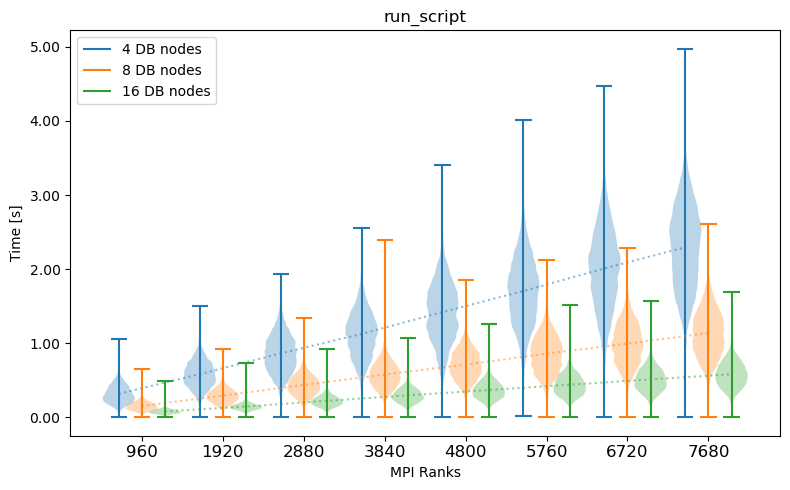

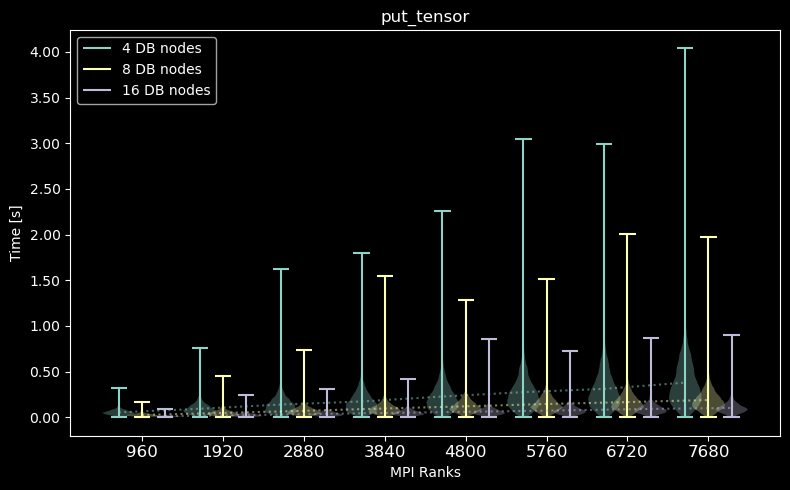

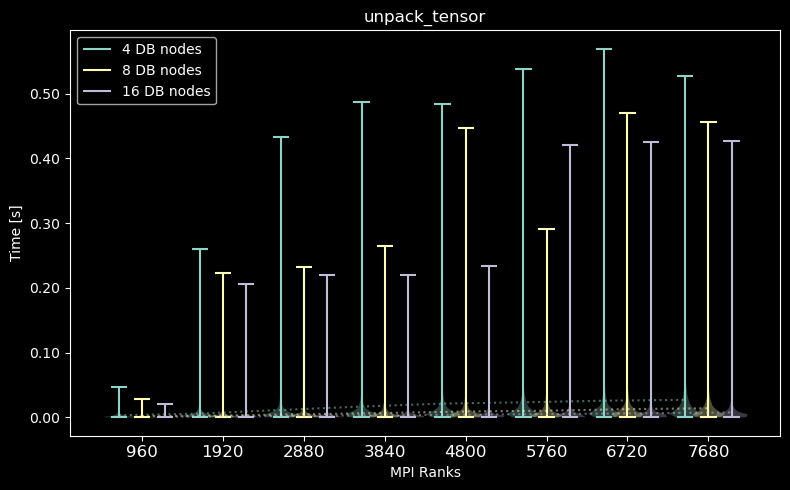

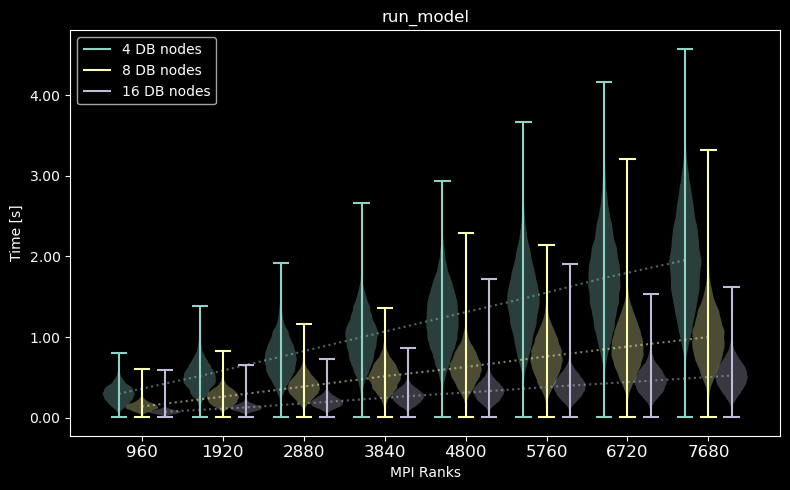

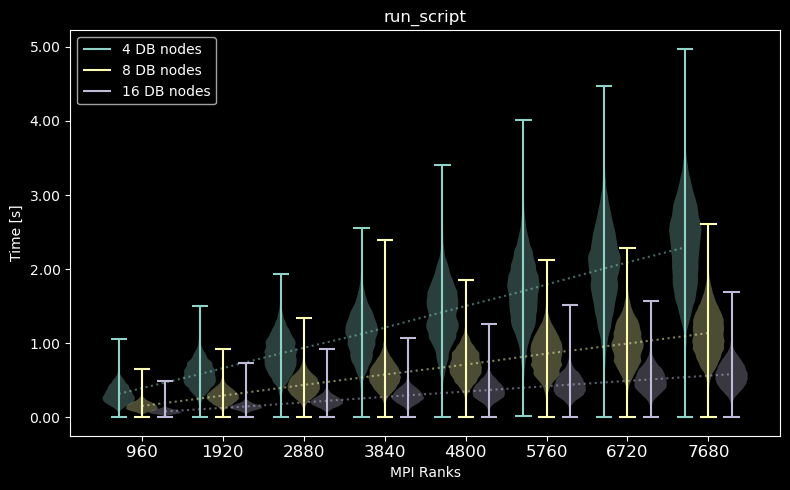

In [6]:
save = True
all_in_one = False
labels = ["put_tensor", "unpack_tensor", "run_model", "run_script"]
palette = sns.set_palette("colorblind", color_codes=True)

for style in tqdm(["light", "dark"], desc="Plotting"):
    if style == "light":
        plt.style.use("default")
    else:
        plt.style.use("dark_background")

    grid_spacing = np.min(np.diff(nnodes))*threads
    legend_entries = []
    ranks = [node*threads for node in nnodes]

    widths = grid_spacing/5
    spacing = grid_spacing/3.5
    color_short = "brgmy"

    aggregate_suffix = "_agg" if aggregate else ""
    plot_type = "violin"

    # Set subplot_index to None to plot to separate files, to 1 to have all plots in one
    subplot_index = 1 if all_in_one else None
    if subplot_index:
        plt.figure(figsize=(8*2,5*2+3))
    for label in tqdm(labels, desc=f"{style} style"):
        if subplot_index:
            ax = plt.subplot(2,2,subplot_index)
        else:
            fig, ax = plt.subplots(figsize=(8,5))

        for i, DB_node in enumerate(tqdm(DB_nodes, desc=label, leave=False)):
            dfs = df_dbs[DB_node]
            positions = ranks+spacing*(i-(len(DB_nodes)-1)/2)
            
            data_list = [dfs[node][label] for node in nnodes]
            
            if plot_type=="violin":
                plot = ax.violinplot(data_list, positions=positions,
                                    widths=grid_spacing/2.5, showextrema=True)
                [col.set_alpha(0.3) for col in plot["bodies"]]
                props_dict = dict(color=plot["cbars"].get_color().flatten())
                entry = plot["cbars"]
                legend_entries.append(entry)
            else:
                props_dict = dict(color=color_short[i])
                plot = ax.boxplot(data_list, showfliers=True, positions=positions, whis=1e9, 
                            boxprops=props_dict, whiskerprops=props_dict, medianprops=props_dict, capprops=props_dict, widths=widths)
                legend_entries.append(plot["whiskers"][0])
            means = [np.mean(dfs[node][label]) for node in nnodes]
            ax.plot(positions, means, ':', color=props_dict['color'], alpha=0.5)

        
        data_labels = [f"{db_node} DB nodes" for db_node in DB_nodes]
        ax.legend(legend_entries, data_labels, loc='upper left')
        
        ax.set_xticks(ranks, minor=False)
        ax.set_xticklabels([rank for rank in ranks], fontdict={'fontsize': 12})

        plt.title(label)
        plt.xlabel("MPI Ranks")
        plt.ylabel("Time [s]")
        ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%2.2f'))

        plt.tight_layout()
        plt.draw()

        
        if not subplot_index:
            if save:
                plt.savefig(f"{label}_{plot_type}{aggregate_suffix}_{style}.pdf")
                plt.savefig(f"{label}_{plot_type}{aggregate_suffix}_{style}.png")
        else:
            subplot_index += 1

    if subplot_index and save:
        plt.savefig(f'all_in_one_{plot_type}{aggregate_suffix}_{style}.pdf')
        plt.savefig(f'all_in_one_{plot_type}{aggregate_suffix}_{style}.png')